# The Sparks Foundation
## Domain: Data Science and Business Analytics
## Batch: November 2021
## By: Sahil Singh
### Task: Prediction using Supervised Machine Learning
### Level: Beginner
### Predict the percentage of an student based on the number of study hours.

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
import seaborn as sns
%matplotlib inline

## Loading the dataset

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Plotting the data

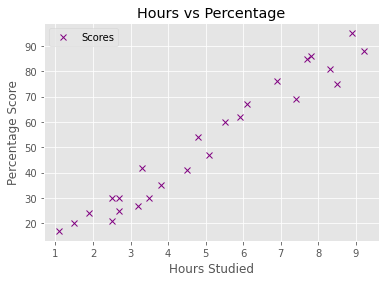

In [5]:
style.use('ggplot')
df.plot(x='Hours', y='Scores', style='x', color='Purple')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

<AxesSubplot:ylabel='Scores'>

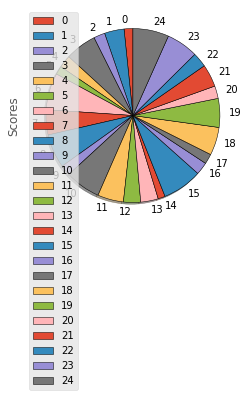

In [6]:
df.plot.pie(x='Hours', y='Scores', wedgeprops={"edgecolor":"black"}, shadow=True, startangle=90)

<AxesSubplot:xlabel='Hours'>

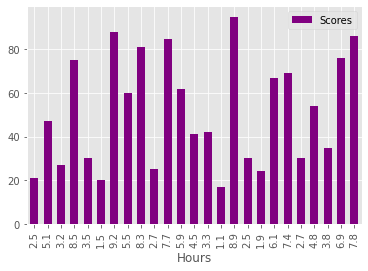

In [7]:
df.plot.bar(x="Hours", y="Scores", width=0.6, color="Purple")

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

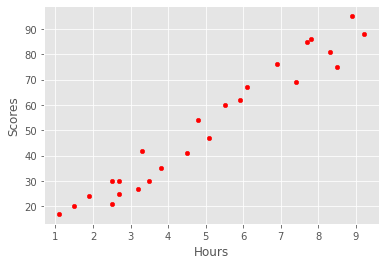

In [8]:
df.plot.scatter(x="Hours", y="Scores", color="Red")

## Importing the relevant libraries for modelling

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Declaring the dependent and independent variables

In [10]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

## Creating the model

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

### Plotting for the test data

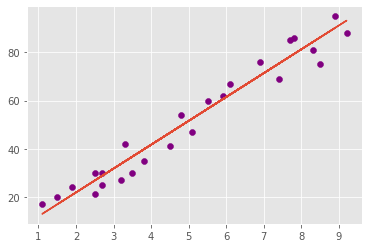

In [12]:
plt.scatter(x, y, color='Purple')

#Plotting the regression line
line = reg.coef_*x + reg.intercept_
plt.plot(x, line)
plt.show()

In [13]:
y_pred = reg.predict(x_test)

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


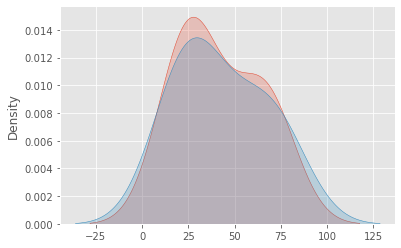

In [15]:
sns.kdeplot(data=y_test, label="Actual", shade=True);
sns.kdeplot(data=y_pred, label="Predicted", shade=True);

## Doing Prediction with own Value

In [16]:
Hours = [[9.25]]
pred = reg.predict(Hours)
print("Number of Hours Studied = {}".format(Hours))
print("Predicted Percentage Score = {}".format(pred))

Number of Hours Studied = [[9.25]]
Predicted Percentage Score = [93.69173249]


## Measuring the accuracy of the model

In [17]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error = {}".format(mae))

train_acc = reg.score(x_train, y_train)
test_acc = reg.score(x_test, y_test)
print("Train Accuracy = {} \nTest Accuracy = {}".format(train_acc, test_acc))

Mean Absolute Error = 4.183859899002975
Train Accuracy = 0.9515510725211552 
Test Accuracy = 0.9454906892105356
